In [ ]:
import tensorflow as tf


In [ ]:
from sklearn.metrics import cohen_kappa_score
import time

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from keras.layers import Dropout

In [ ]:
d = pd.read_csv("/content/data_comp.csv", index_col=0)

In [ ]:
X = d.iloc[:, :-1].values
y = d.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 6)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train

In [ ]:
X_train = X_train.reshape(X_train.shape[0],6 , 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0],6 , 1)


In [ ]:
y_train

In [ ]:
tf.random.set_seed(69)

In [ ]:
lstm = keras.Sequential()

In [ ]:
lstm.add(keras.layers.LSTM(20,batch_input_shape = (None,6,1), return_sequences=False, recurrent_activation='relu'))

In [ ]:
lstm.add(keras.layers.Dense(3,activation="relu"))

In [ ]:
lstm.add(keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy'])

In [ ]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 3)                 63        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 1,827
Trainable params: 1,827
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
his = lstm.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0361 - true_positives: 177.0000 - true_negatives: 1913.0000 - false_positives: 4.0000 - false_negatives: 15.0000 - accuracy: 0.9910 - val_loss: 0.1223 - val_true_positives: 57.0000 - val_true_negatives: 623.0000 - val_false_positives: 10.0000 - val_false_negatives: 13.0000 - val_accuracy: 0.9673
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0265 - true_positives: 179.0000 - true_negatives: 1916.0000 - false_positives: 1.0000 - false_negatives: 13.0000 - accuracy: 0.9934 - val_loss: 0.1456 - val_true_positives: 59.0000 - val_true_negatives: 623.0000 - val_false_positives: 10.0000 - val_false_negatives: 11.0000 - val_accuracy: 0.9701
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0273 - true_positives: 177.0000 - true_negatives: 1910.0000 - false_positives: 7.0000 - false_negatives: 15.0000 - accuracy: 0.9896 - val_loss: 0.1429 - val_true_positives: 54.0000 

In [ ]:
start = time.time()
pred = lstm.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")



Training time: 0.23592591285705566s


In [ ]:
for i in range(len(pred)):
    if pred[i] <0.5:
        pred[i]=0
    else:
        pred[i]=1

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy_score(y_test, pred)

[[628   5]
 [ 15  55]]


0.9715504978662873

In [ ]:
plt.figure(figsize = (20,12))
plt.scatter(range(703),pred,c='r')
plt.scatter(range(703),y_test,c='b')
plt.show()

In [ ]:
cohen_kappa_score(y_test,pred)

0.830581997831064

In [ ]:
train_loss = his.history['loss']
test_loss = his.history['val_loss']

In [ ]:
epoch_count = range(1, len(train_loss) + 1)

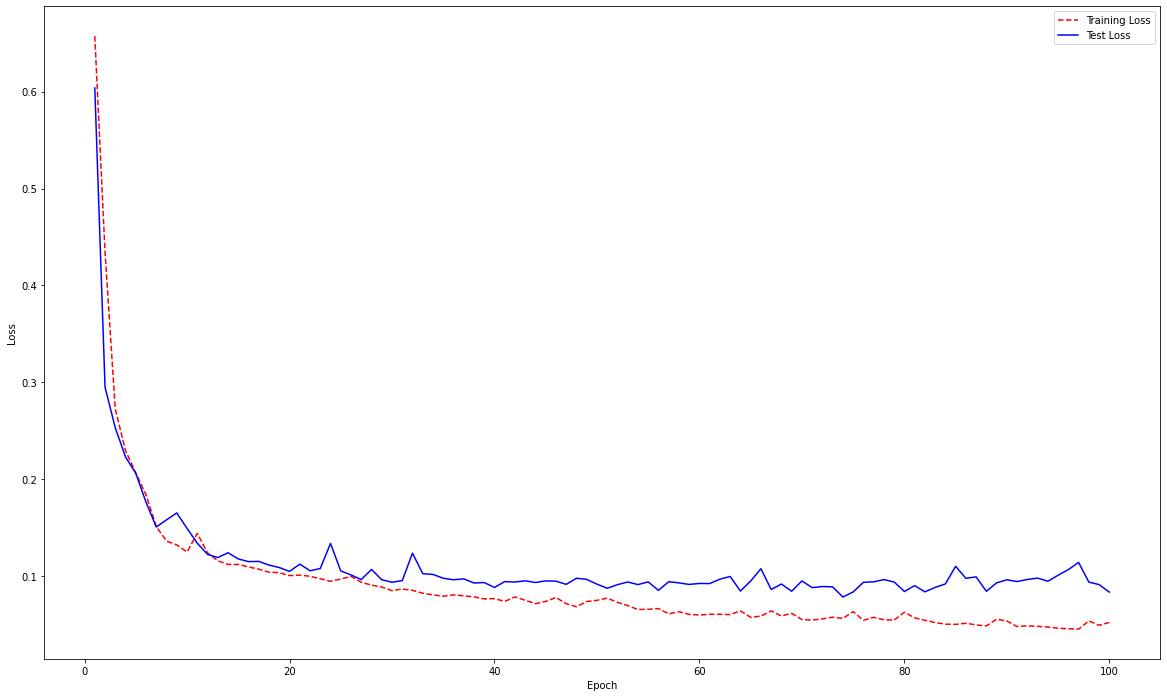

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
acc_loss = his.history['accuracy']
test_acc_loss = his.history['val_accuracy']

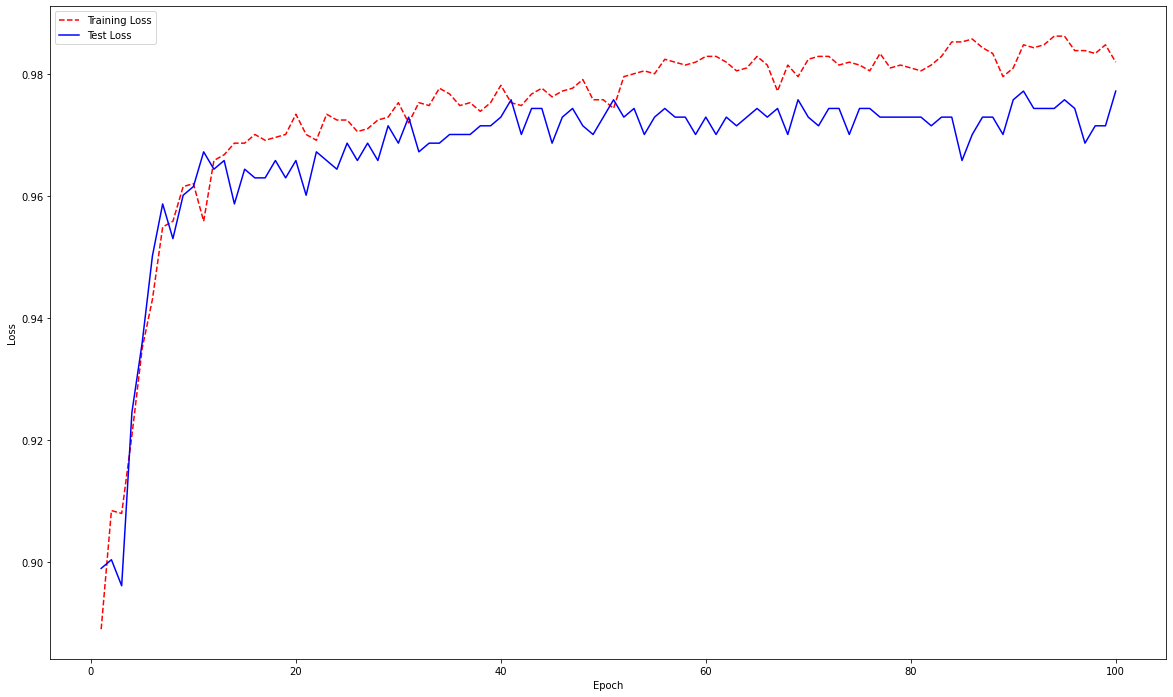

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(epoch_count, acc_loss, 'r--')
plt.plot(epoch_count, test_acc_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();